In [1]:
import numpy as np # Multi-dimensional array object
import pandas as pd # Data Manipulation
import seaborn as sns # Data Visualization
import matplotlib.pyplot as plt # Data Visualization
from collections import Counter
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Voiture = pd.read_table("cars-origin.txt",sep="\t",header=0,index_col=0)

In [3]:
print(Voiture.shape)

(392, 6)


In [4]:
#Les noms des colonnes
print(Voiture.columns)

Index(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration',
       'origin'],
      dtype='object')


In [5]:
#Type de chaque colonne
print(Voiture.dtypes)

mpg              int64
displacement     int64
horsepower       int64
weight           int64
acceleration     int64
origin          object
dtype: object


array([[<AxesSubplot:xlabel='mpg', ylabel='mpg'>,
        <AxesSubplot:xlabel='displacement', ylabel='mpg'>,
        <AxesSubplot:xlabel='horsepower', ylabel='mpg'>,
        <AxesSubplot:xlabel='weight', ylabel='mpg'>,
        <AxesSubplot:xlabel='acceleration', ylabel='mpg'>],
       [<AxesSubplot:xlabel='mpg', ylabel='displacement'>,
        <AxesSubplot:xlabel='displacement', ylabel='displacement'>,
        <AxesSubplot:xlabel='horsepower', ylabel='displacement'>,
        <AxesSubplot:xlabel='weight', ylabel='displacement'>,
        <AxesSubplot:xlabel='acceleration', ylabel='displacement'>],
       [<AxesSubplot:xlabel='mpg', ylabel='horsepower'>,
        <AxesSubplot:xlabel='displacement', ylabel='horsepower'>,
        <AxesSubplot:xlabel='horsepower', ylabel='horsepower'>,
        <AxesSubplot:xlabel='weight', ylabel='horsepower'>,
        <AxesSubplot:xlabel='acceleration', ylabel='horsepower'>],
       [<AxesSubplot:xlabel='mpg', ylabel='weight'>,
        <AxesSubplot:xlabel='d

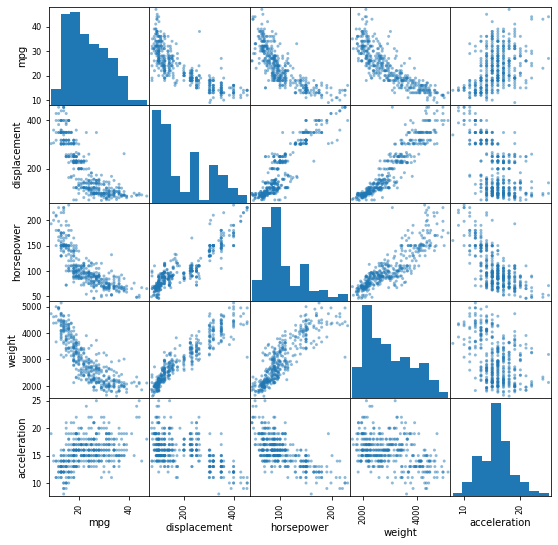

In [6]:
#graphique - croisement deux à deux des variables
from pandas.plotting import scatter_matrix 
scatter_matrix(Voiture,figsize=(9,9))

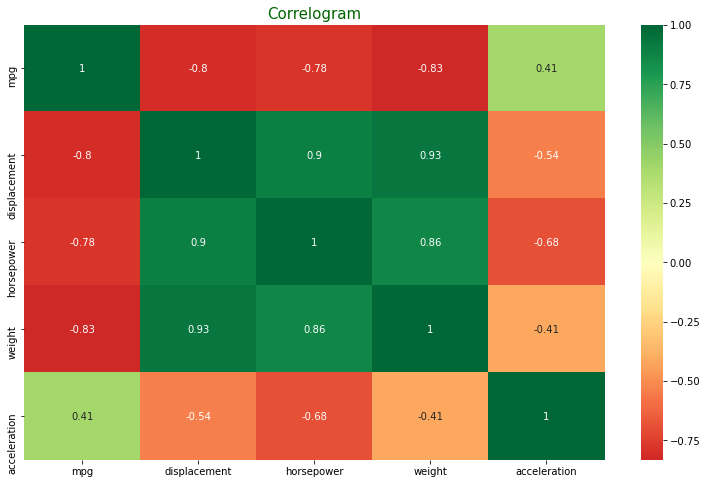

In [7]:
corr = Voiture.corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

In [8]:
Voiture.origin.unique()

array(['asian', 'american', 'european'], dtype=object)

In [9]:
Voiture['origin'].replace({"asian":0,"american":1,"european":2})

Numero
1      0
2      0
3      0
4      0
5      0
      ..
388    1
389    1
390    1
391    1
392    1
Name: origin, Length: 392, dtype: int64

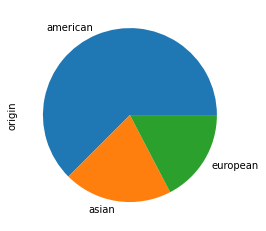

In [10]:
Voiture['origin'].value_counts().plot.pie()
plt.show()

In [11]:
def BSMOTE(X,y):

    
    
# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    X, y = BorderlineSMOTE().fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
    return X_train, X_test, y_train, y_test

In [12]:
def SMOTE(X,y):
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from sklearn.datasets import make_classification
    from imblearn.over_sampling import SMOTE
    from matplotlib import pyplot
    from numpy import where
   

    counter = Counter(y)
    print(counter)
# transform the dataset
    smt = SMOTE(random_state=0)
    X, y = smt.fit_sample(X, y) 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
    return X_train, X_test, y_train, y_test

In [13]:
def ADASYN(X,y):
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import ADASYN
    from matplotlib import pyplot
    from numpy import where

# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    X, y = ADASYN().fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)

    return X_train, X_test, y_train, y_test

In [14]:
def SMOTESVM(X,y):
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import SVMSMOTE
    from matplotlib import pyplot
    from numpy import where

    

# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    X, y = SVMSMOTE().fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
    return X_train, X_test, y_train, y_test

In [15]:
y = Voiture['origin']
X = Voiture.drop('origin',axis=1)

In [16]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#Z = sc.fit_transform(X)
#print(Z)

In [17]:
#from sklearn.preprocessing import MinMaxScaler
#sc = MinMaxScaler()
#Z= scaler.fit_transform(X)
#print(Z)

In [18]:
sc = StandardScaler()
Z= sc.fit_transform(X)
#print(Z)

In [19]:
X_train, X_test, y_train, y_test= ADASYN(Z,y)

Counter({'american': 245, 'asian': 79, 'european': 68})
Counter({'european': 261, 'asian': 258, 'american': 245})


In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
leaf_size = list(range(2,20))# Par défaut c'est 30
n_neighbors = list(range(2,25))
p=[1,2] #p = 1 manhattan_distance/p=2 euclidean_distance
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=12, n_jobs=-1)
#n_jobs: number of CPU'sfor execution.
#cv: number of folds of the cross validation

#Fit the model
best_model = clf.fit(X_test, y_test)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 2
Best p: 1
Best n_neighbors: 4


In [40]:
best_parameters = clf.best_params_
print(best_parameters)

{'leaf_size': 2, 'n_neighbors': 4, 'p': 1}


In [41]:
best_result = clf.best_score_
print(best_result)

0.7787280701754385


In [49]:
knn = KNeighborsClassifier(n_neighbors=4,p=2,leaf_size=2)
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

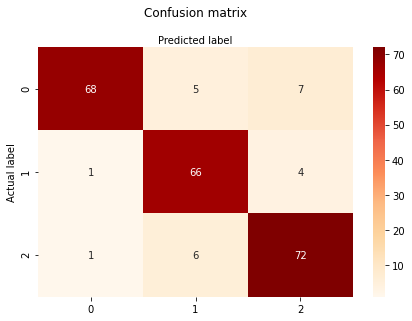

In [50]:
#SMOTESVM
conf=confusion_matrix(y_test, y_pred_knn)
class_names=[0,1,2]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf), annot=True, cmap="OrRd"  ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [51]:
#ADASYN
print('ADASYN\n')
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

ADASYN

Accuracy of K-NN classifier on training set: 0.91
Accuracy of K-NN classifier on test set: 0.90


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

    american       0.97      0.85      0.91        80
       asian       0.86      0.93      0.89        71
    european       0.87      0.91      0.89        79

    accuracy                           0.90       230
   macro avg       0.90      0.90      0.90       230
weighted avg       0.90      0.90      0.90       230

